<html>
    <body>
        <h1 class="alert alert-info" style="text-align: center;">Surviving the Titanic: A Machine Learning Approach to Predicting Passenger Survival</h1>
        <h2 id="contents">Table of Contents</h2>
        <ol>
            <a href="#section1"><li>Importing libraries and loading the dataset</li></a>
            <a href="#section2"><li>Exploring the dataset</li></a>
            <a href="#section3"><li>Data cleaning</li></a>
            <a href="#section4"><li>Exploratory data analysis</li></a>
            <ol>
                <a href="#sub_section1_1"><li type="i">Univariate analysis</li></a>
                <a href="#sub_section1_2"><li type="i">Bivariate analysis</li></a>
            </ol>        
            <a href="#section5"><li>Data Prepocessing</li></a>
            <a href="#section6"><li>Model Building and Evaluation</li></a>
            <ol>
                <a href="#sub_section2_1"><li type="i">KNN Classifier</li></a>
                <a href="#sub_section2_2"><li type="i">Logistic Regreassion</li></a>
                <a href="#sub_section2_3"><li type="i">Decision Tree Classifier</li></a>
                <a href="#sub_section2_4"><li type="i">MPLC Classifier</li></a>
                <a href="#sub_section2_5"><li type="i">Support Vector Machine</li></a>
            </ol> 
        </ol>
    </body>
</html>

<div class="col-md-8">
    <h2 id="section1">1. Importing libraries and loading the dataset</h2>
    <p>Let's start by importing the necessary libraries and loading the dataset.</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
import warnings
import re

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

warnings.filterwarnings(action = 'ignore')

In [3]:
# Read the data
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')
df_submission  = pd.read_csv('../input/titanic/gender_submission.csv')

<div class="col-md-8">
    <h2 id="section2">2. Exploring the dataset</h2>
    <p>Let's explore the datasets:</p>
</div>
<div class="col-md-4">
    <a href="#contens">Back to top</h2>
</div>

In [4]:
# Shape of the data
print('Shape of the train data: %s', df_train.shape)
print('Shape of the test data: %s', df_test.shape)
print('Shape of the submission data: %s', df_submission.shape)

Shape of the train data: %s (891, 12)
Shape of the test data: %s (418, 11)
Shape of the submission data: %s (418, 2)


In [5]:
# Sample train data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Smaple of test data
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# Sample submission data
df_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


<p>Let's explore the train dataset to get a better understanding of its structure and content:</p>

In [8]:
# Data types
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# Summary statistics
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Unique values in each column
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

<div class="col-md-8">
    <h3 id="section3">3. Data cleaning</h3>
    <p>Nice! We have a dataset with <b>891</b> rows and <b>12</b> columns. Let's clean the dataset by handling missing values, duplicates, irrelevant columns, and converting data types.</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [11]:
# Let's create a copy of the train and test data to perform data cleaning
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [12]:
# Missing values in train data
df_train_copy.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
# Missing values in test data
df_test_copy.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<p>We have ver high number of missing values in <b>Cabin</b> followed by <b>Age</b> and just 2 in <b>Embarked</b> column.</p>
<p>Lets impute missing values in <b>Embarked</b> column by mode. and check the other columns if they have any patterns</p>

In [14]:
# Impute missing values in Age column with median
# df_train_copy['Age'] = df_train_copy['Age'].fillna(df_train_copy['Age'].median())
# df_test_copy['Age'] = df_test_copy['Age'].fillna(df_test_copy['Age'].median())

# Impute missing values in Embarked column with mode
df_train_copy['Embarked'] = df_train_copy['Embarked'].fillna(df_train_copy['Embarked'].mode()[0])
df_test_copy['Embarked'] = df_test_copy['Embarked'].fillna(df_test_copy['Embarked'].mode()[0])


<p>Here empty values in <b>Cabin</b> column may indicate that passenger didn't have a cabin. So we can explore further if emplty values in cabin has relation with Survived</p>

In [15]:
# Check if there is any relations between the missing values in Cabin column and Survived column
df_train_copy[df_train_copy['Cabin'].isna()]['Survived'].value_counts()

0    481
1    206
Name: Survived, dtype: int64

<p>We can clearly see that passengers with empty values in <b>Cabin</b> column have less chance of survival.</p>
<p>Cabin has signficant effect on Survival soo let's create a new category for the missing Cabins called "Missing"</p>

In [16]:
# Impute missing values in Cabin column with 'Missing'
df_train_copy['Cabin'] = df_train_copy['Cabin'].fillna('Missing')
df_test_copy['Cabin'] = df_test_copy['Cabin'].fillna('Missing')

<p>Now let's check what variable can impact Age. In the Name column we can see the Initial which can give some information about the Age, let's extract that.</p>

In [17]:
# Let's extract the name title from the Name column
df_train_copy['Name_Title'] = df_train_copy['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
df_test_copy['Name_Title'] = df_test_copy['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

df_train_copy['Name_Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name_Title, dtype: int64

In [18]:
# Let's combine the similar titles, we will combine Mlle, Jonkheer and Ms with Miss, Mme, Countess and Lady with Mrs and Rev, Dr, Col, Major, Don, Sir, Capt with Rare
df_train_copy['Name_Title'] = df_train_copy['Name_Title'].replace(['Mlle', 'Ms', 'Jonkheer'], 'Miss')
df_train_copy['Name_Title'] = df_train_copy['Name_Title'].replace(['Mme', 'Countess', 'Lady', 'Dona'], 'Mrs')
df_train_copy['Name_Title'] = df_train_copy['Name_Title'].replace(['Rev', 'Dr', 'Col', 'Major', 'Don', 'Sir', 'Capt'], 'Rare')

df_test_copy['Name_Title'] = df_test_copy['Name_Title'].replace(['Mlle', 'Ms', 'Jonkheer'], 'Miss')
df_test_copy['Name_Title'] = df_test_copy['Name_Title'].replace(['Mme', 'Countess', 'Lady', 'Dona'], 'Mrs')
df_test_copy['Name_Title'] = df_test_copy['Name_Title'].replace(['Rev', 'Dr', 'Col', 'Major', 'Don', 'Sir', 'Capt'], 'Rare')

df_train_copy['Name_Title'].value_counts()

Mr        517
Miss      186
Mrs       128
Master     40
Rare       20
Name: Name_Title, dtype: int64

In [19]:
# Now let's see the Age of the passengers with respect to their Name_Title
df_train_copy.groupby('Name_Title')['Age'].median()

Name_Title
Master     3.5
Miss      21.5
Mr        30.0
Mrs       35.0
Rare      49.0
Name: Age, dtype: float64

In [20]:
# Great, now let's impute the missing values in Age column with the median of the respective Name_Title
df_train_copy.loc[(df_train_copy['Age'].isna()) & (df_train_copy['Name_Title'] == 'Master'), 'Age'] = df_train_copy[df_train_copy['Name_Title'] == 'Master']['Age'].median()
df_train_copy.loc[(df_train_copy['Age'].isna()) & (df_train_copy['Name_Title'] == 'Mr'), 'Age'] = df_train_copy[df_train_copy['Name_Title'] == 'Mr']['Age'].median()
df_train_copy.loc[(df_train_copy['Age'].isna()) & (df_train_copy['Name_Title'] == 'Mrs'), 'Age'] = df_train_copy[df_train_copy['Name_Title'] == 'Mrs']['Age'].median()
df_train_copy.loc[(df_train_copy['Age'].isna()) & (df_train_copy['Name_Title'] == 'Miss'), 'Age'] = df_train_copy[df_train_copy['Name_Title'] == 'Miss']['Age'].median()
df_train_copy.loc[(df_train_copy['Age'].isna()) & (df_train_copy['Name_Title'] == 'Rare'), 'Age'] = df_train_copy[df_train_copy['Name_Title'] == 'Rare']['Age'].median()

df_test_copy.loc[(df_test_copy['Age'].isna()) & (df_test_copy['Name_Title'] == 'Miss'), 'Age'] = df_test_copy[df_test_copy['Name_Title'] == 'Miss']['Age'].median()
df_test_copy.loc[(df_test_copy['Age'].isna()) & (df_test_copy['Name_Title'] == 'Mr'), 'Age'] = df_test_copy[df_test_copy['Name_Title'] == 'Mr']['Age'].median()
df_test_copy.loc[(df_test_copy['Age'].isna()) & (df_test_copy['Name_Title'] == 'Mrs'), 'Age'] = df_test_copy[df_test_copy['Name_Title'] == 'Mrs']['Age'].median()
df_test_copy.loc[(df_test_copy['Age'].isna()) & (df_test_copy['Name_Title'] == 'Master'), 'Age'] = df_test_copy[df_test_copy['Name_Title'] == 'Master']['Age'].median()
df_test_copy.loc[(df_test_copy['Age'].isna()) & (df_test_copy['Name_Title'] == 'Rare'), 'Age'] = df_test_copy[df_test_copy['Name_Title'] == 'Rare']['Age'].median()


In [21]:
# Let see if we still have any missing values in the train data
df_train_copy.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Name_Title     0
dtype: int64

In [22]:
# Imputing missing values in Fare column with median in test data
df_test_copy['Fare'] = df_test_copy['Fare'].fillna(df_test_copy['Fare'].median())

# Let see if we still have any missing values in test data
df_test_copy.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Name_Title     0
dtype: int64

In [23]:
# Check for duplicates in train data
df_train_copy.duplicated().sum()

0

In [24]:
# Check for duplicates in test data
df_test_copy.duplicated().sum()

0

<p>No duplicates in the dataset! Let's move on to the next step.</p>

<p>Let's convert Survived, Pclass, Sex, SibSp, Parch, and Embarked to categorical variables.</p>

In [25]:
# Convert Name, Survived, Pclass, Sex, SibSp, Parch, Embarked, Ticket, Cabin to categorical variables in train data
df_train_copy['Survived'] = df_train_copy['Survived'].astype('category')
df_train_copy['Pclass'] = df_train_copy['Pclass'].astype('category')
df_train_copy['Sex'] = df_train_copy['Sex'].astype('category')
df_train_copy['SibSp'] = df_train_copy['SibSp'].astype('category')
df_train_copy['Parch'] = df_train_copy['Parch'].astype('category')
df_train_copy['Embarked'] = df_train_copy['Embarked'].astype('category')
df_train_copy['Ticket'] = df_train_copy['Ticket'].astype('category')
df_train_copy['Cabin'] = df_train_copy['Cabin'].astype('category')
df_train_copy['Name'] = df_train_copy['Name'].astype('category')


In [26]:
# Convert Name, Pclass, Sex, SibSp, Parch, Embarked, Ticket, Cabin to categorical variables in test data
df_test_copy['Pclass'] = df_test_copy['Pclass'].astype('category')
df_test_copy['Sex'] = df_test_copy['Sex'].astype('category')
df_test_copy['SibSp'] = df_test_copy['SibSp'].astype('category')
df_test_copy['Parch'] = df_test_copy['Parch'].astype('category')
df_test_copy['Embarked'] = df_test_copy['Embarked'].astype('category')
df_test_copy['Ticket'] = df_test_copy['Ticket'].astype('category')
df_test_copy['Cabin'] = df_test_copy['Cabin'].astype('category')
df_test_copy['Name'] = df_test_copy['Name'].astype('category')

<div class="col-md-8">
    <h3 id="section4">4. Exploratory data analysis</h3>
    <p>Let's perform exploratory data analysis to extract insights from the cab trips dataset:</p>
    <h4 id="sub_section1_1" >i. Univariate analysis</h4>
    <p>We will start by exploring the distribution of the numerical and categorical variables in the dataset:</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [27]:
# Function for calculating descriptives of numeric variable and plotting the distribution
def plot_dist(df, col, x_label, y_label, plot_title):
    _min = df[col].min()
    _max = df[col].max()
    ran = df[col].max()-df[col].min()
    mean = df[col].mean()
    median = df[col].median()
    st_dev = df[col].std()
    skew = df[col].skew()
    kurt = df[col].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.histplot(data=df, x=col, bins=30, kde=True, color='dodgerblue')
    sns.lineplot(x=points, y=[0,0], color = 'black', label = "std_dev")
    sns.scatterplot(x=[_min,_max], y=[0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # Creating a DataFrame for the descriptive statistics
    variable_stats = pd.DataFrame({'Statistics': ['Minimum Value', 'Maximum Value', 'Range', 'Mean', 
                                                    'Median', 'Standard Deviation', 'Skewness', 'Kurtosis'], 
                                        'Value': [_min, _max, ran, mean, median, st_dev, skew, kurt]})
    
    plt.show()

    display(tabulate(variable_stats, headers='keys', showindex=False, tablefmt='html'))


In [28]:
# Function for plolting the distribution of categorical variables
def plot_cat(df, col, x_label, y_label, plot_title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.countplot(data=df, x=col, color='dodgerblue')
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show()

<p>Here Survived column is our target variable. Let's explore its distribution.</p>

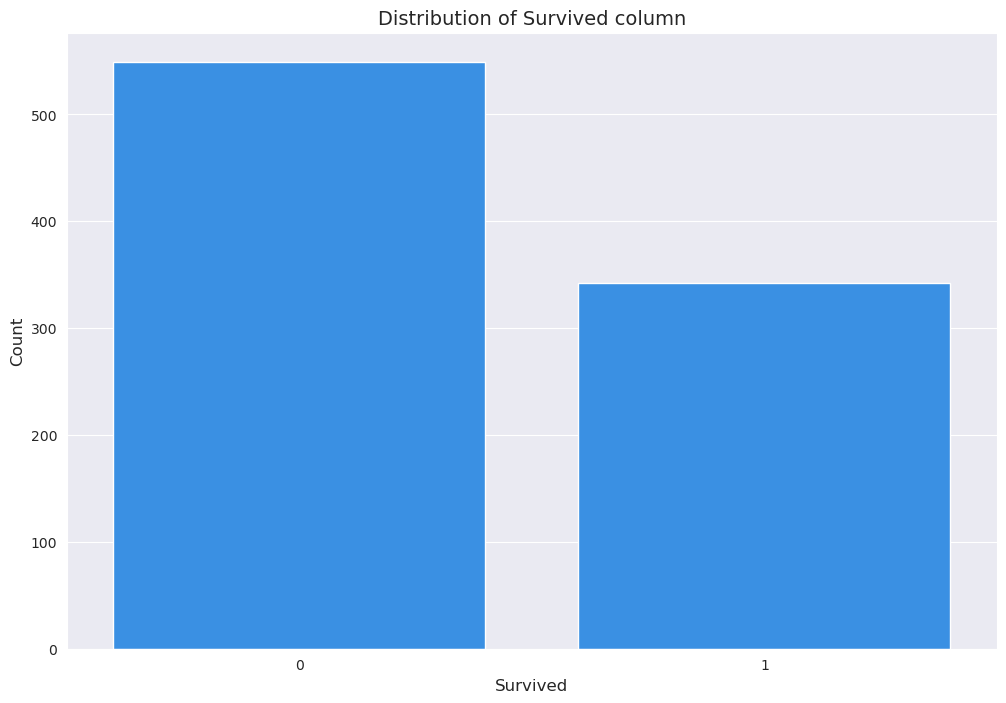

In [29]:
# Plot distribution of Survived column
plot_cat(df_train_copy, 'Survived', 'Survived', 'Count', 'Distribution of Survived column')

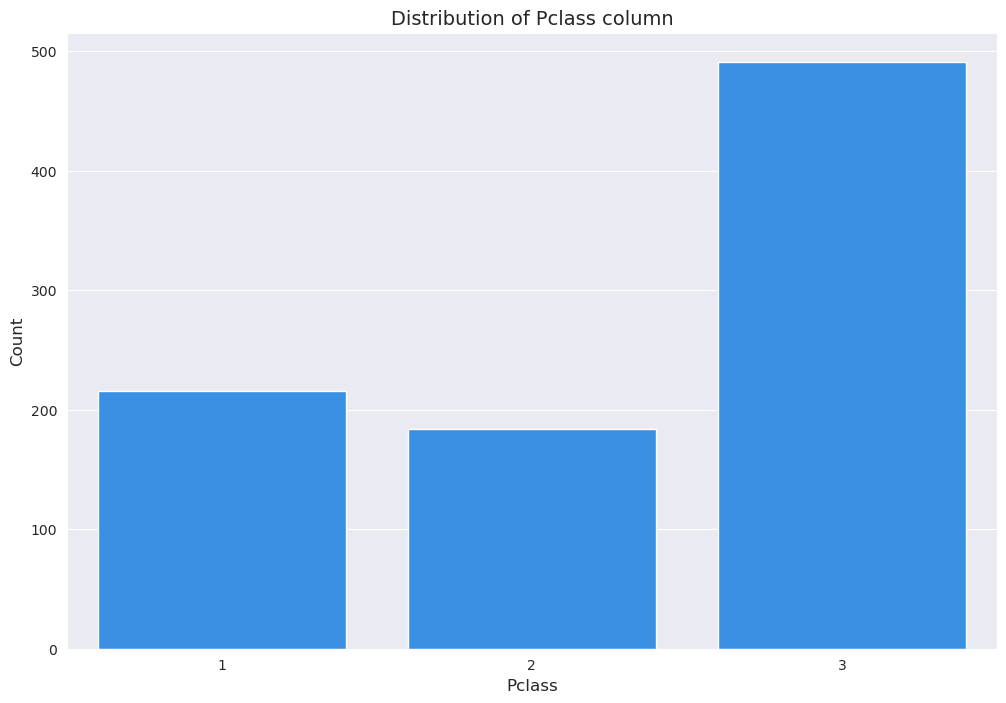

In [30]:
# Plotting distribution of Pclass column
plot_cat(df_train_copy, 'Pclass', 'Pclass', 'Count', 'Distribution of Pclass column')

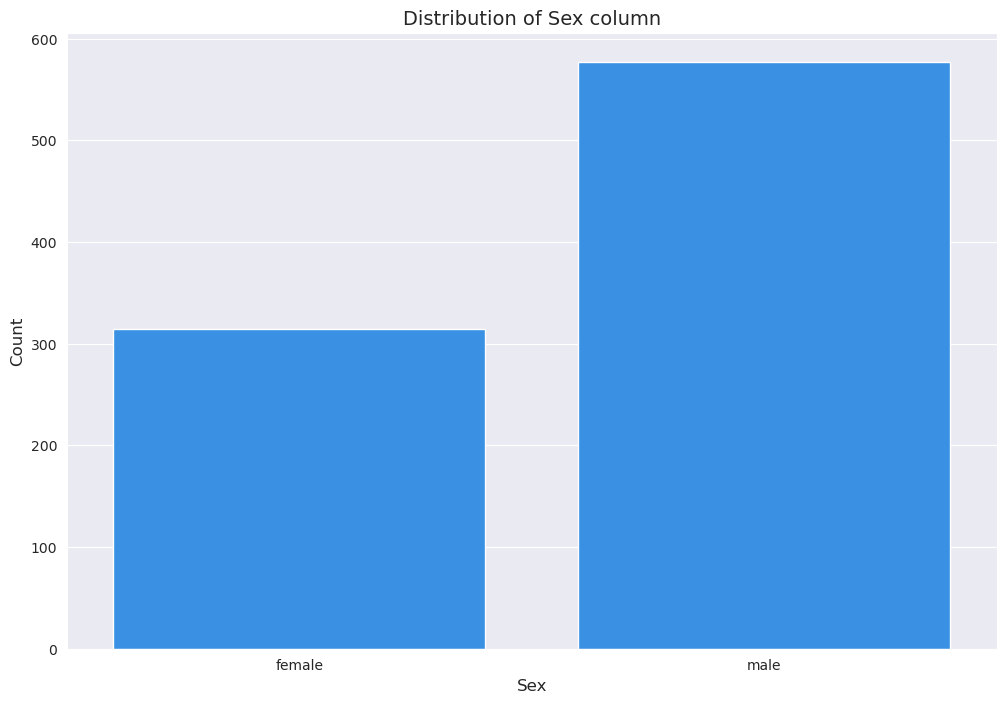

In [31]:
# Plotting distribution of Sex column
plot_cat(df_train_copy, 'Sex', 'Sex', 'Count', 'Distribution of Sex column')

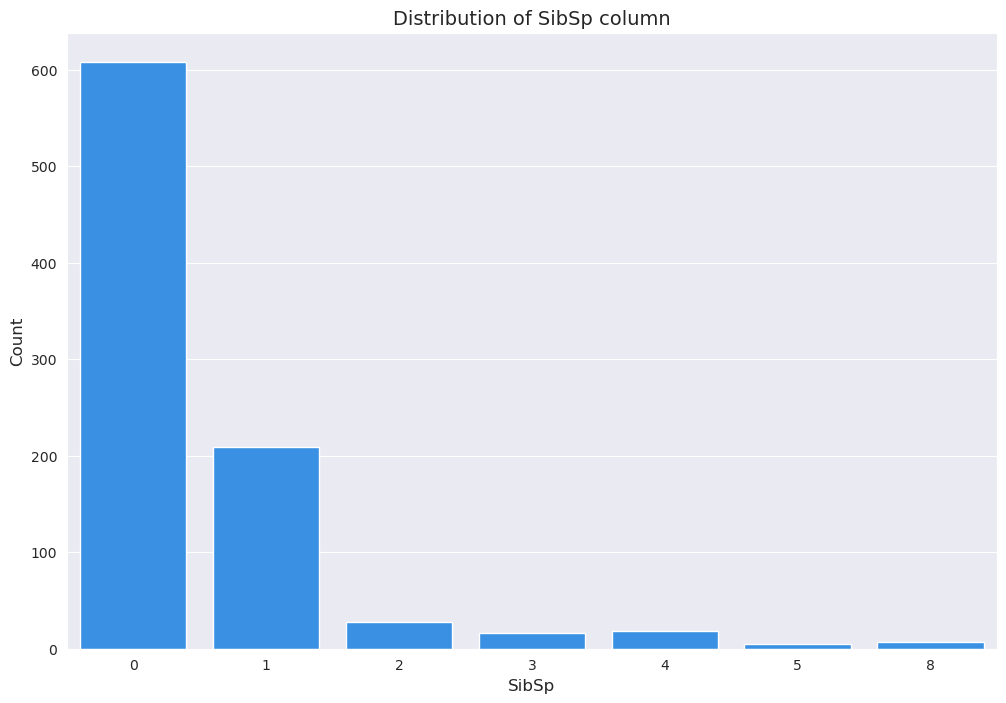

In [32]:
# Plottting distribution of SibSp column
plot_cat(df_train_copy, 'SibSp', 'SibSp', 'Count', 'Distribution of SibSp column')

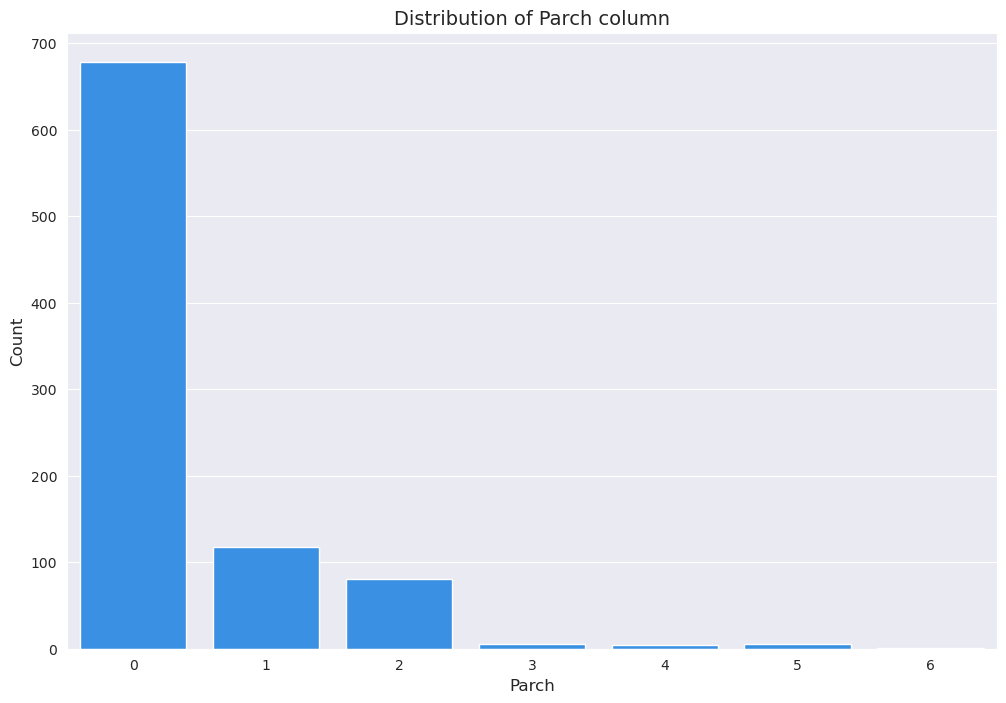

In [33]:
# Plottting distribution of Parch column
plot_cat(df_train_copy, 'Parch', 'Parch', 'Count', 'Distribution of Parch column')

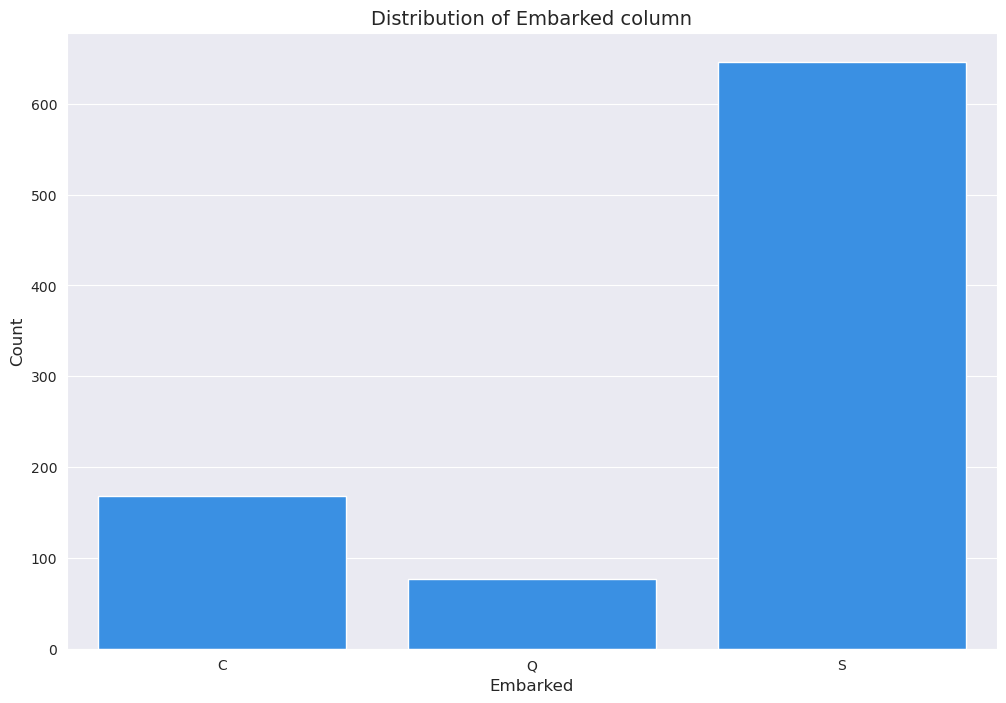

In [34]:
# Plottting distribution of Embarked column
plot_cat(df_train_copy, 'Embarked', 'Embarked', 'Count', 'Distribution of Embarked column')

<p>Lets explore the distribution of numerical variables.</p>

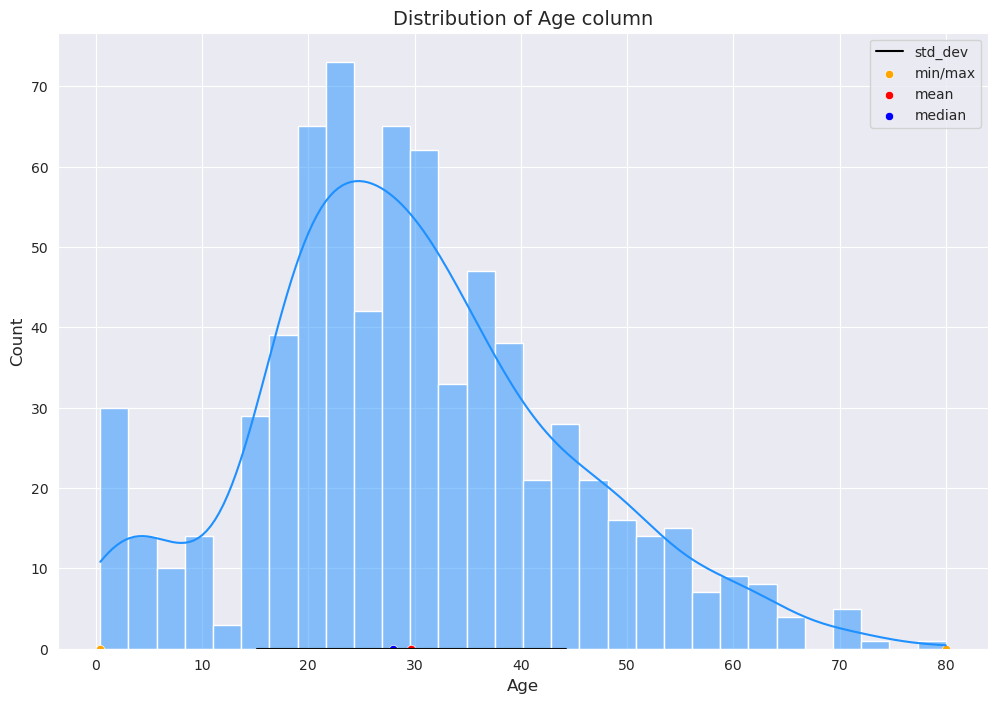

Statistics,Value
Minimum Value,0.42
Maximum Value,80
Range,79.58
Mean,29.6991
Median,28
Standard Deviation,14.5265
Skewness,0.389108
Kurtosis,0.178274


In [35]:
# Plotting distribution of Age column
plot_dist(df_train, 'Age', 'Age', 'Count', 'Distribution of Age column')

<ul>
    <li>Median Age is 28.</li>
    <li>Mean and Median Age are almost same. So Age is normally distributed.</li>
</ul>

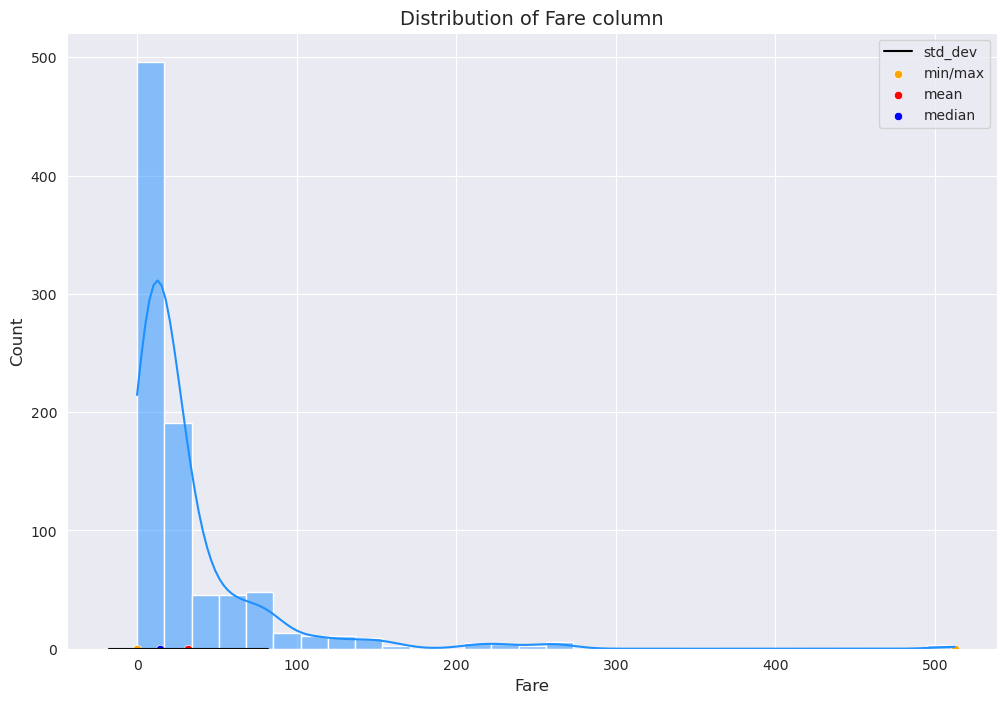

Statistics,Value
Minimum Value,0
Maximum Value,512.329
Range,512.329
Mean,32.2042
Median,14.4542
Standard Deviation,49.6934
Skewness,4.78732
Kurtosis,33.3981


In [36]:
# Let's see how Fare column is distributed
plot_dist(df_train, 'Fare', 'Fare', 'Count', 'Distribution of Fare column')

<p>Kurtosis of Fare is very high. So Fare is highly skewed.</p>
<p>Which is as expected, because certain classes will have higher fares than others and limited seats.</p>

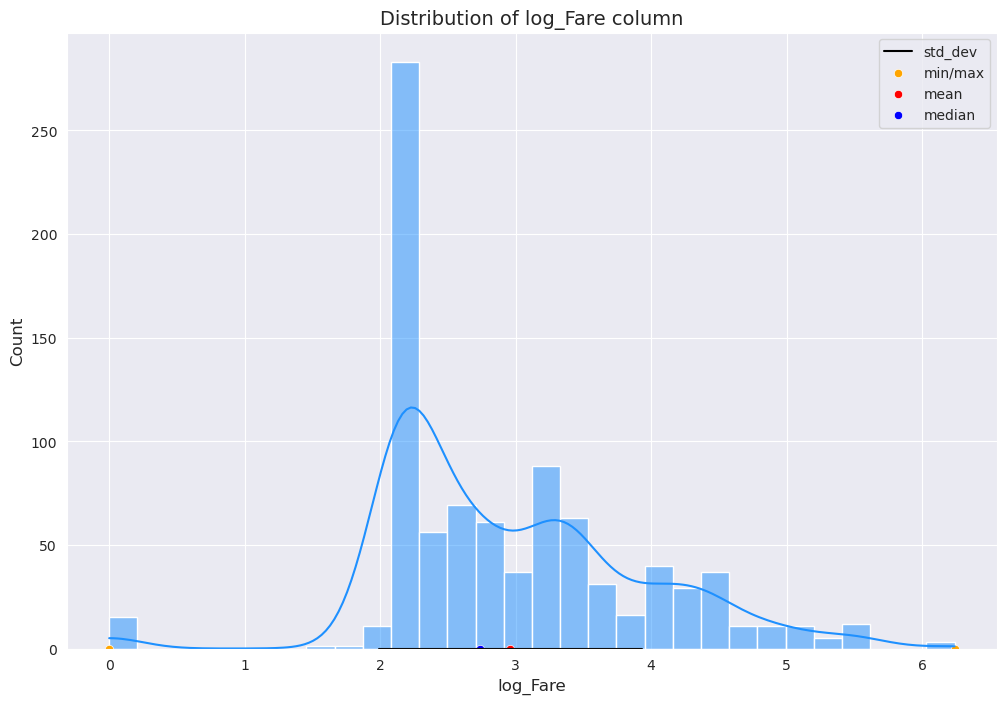

Statistics,Value
Minimum Value,0
Maximum Value,6.24092
Range,6.24092
Mean,2.96225
Median,2.73788
Standard Deviation,0.969048
Skewness,0.394928
Kurtosis,0.976142


In [37]:
# Let's create a new variable log_Fare by taking log of Fare column
df_train_copy['log_Fare'] = np.log(df_train_copy['Fare']+1)
df_test_copy['log_Fare'] = np.log(df_test_copy['Fare']+1)

# Plotting distribution of log_Fare column
plot_dist(df_train_copy, 'log_Fare', 'log_Fare', 'Count', 'Distribution of log_Fare column')

<div class="col-md-8">
    <h4 id="sub_section1_2">ii. Bivariate analysis</h4>
    <p>Let's explore the relationship between the trip duration and other variables in the dataset:</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [38]:
# Function for plotting the distribution of numeric variables against the target variable
# Here target variable is assumed to be categorical
def plot_num_vs_target(df, col, target, x_label, y_label, plot_title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.boxplot(data=df, x=target, y=col, color='dodgerblue')
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show()

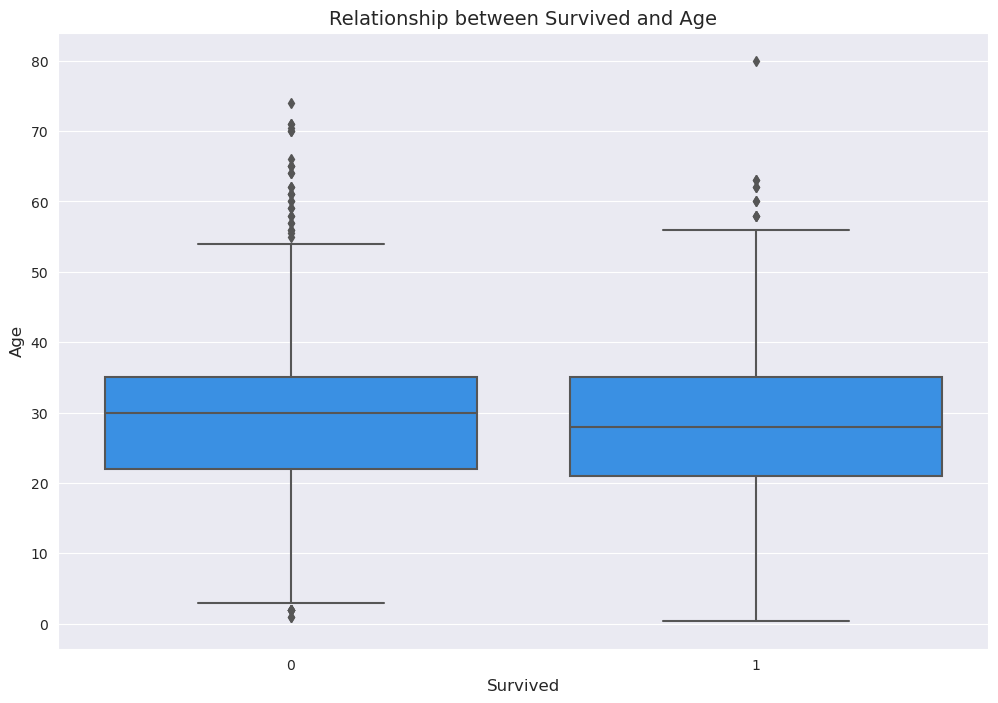

In [39]:
# Relationship between Survived and Age
plot_num_vs_target(df_train_copy, 'Age', 'Survived', 'Survived', 'Age', 'Relationship between Survived and Age')

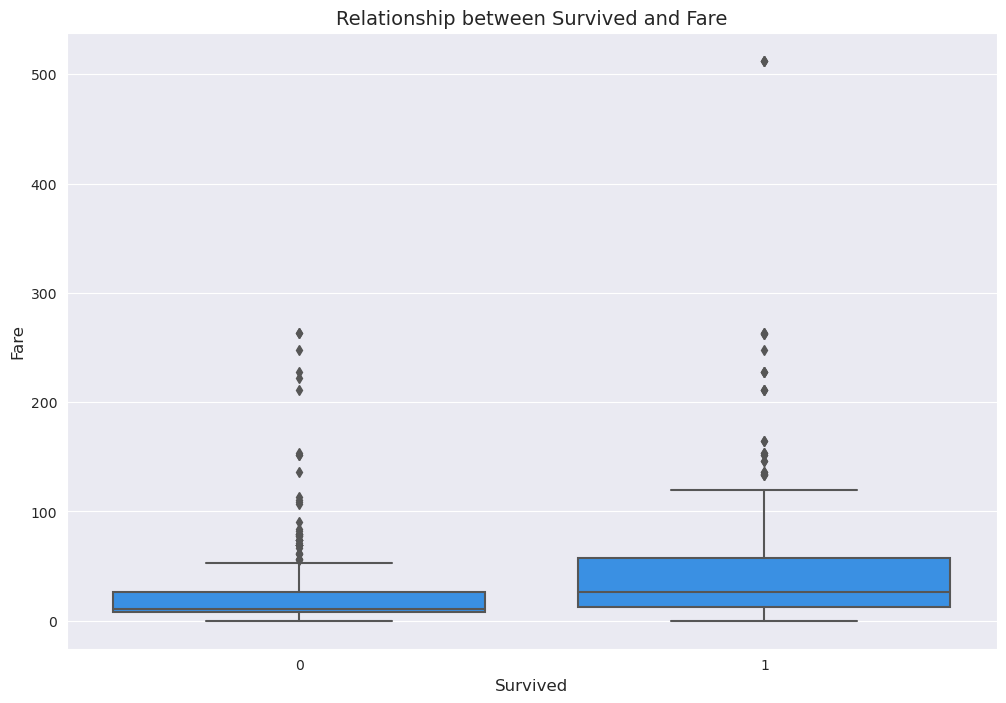

In [40]:
# Relationship between Survived and Fare
plot_num_vs_target(df_train_copy, 'Fare', 'Survived', 'Survived', 'Fare', 'Relationship between Survived and Fare')

In [41]:
# Function for plotting the distribution of categorical variables against the target variable
# Here target variable and categorical variable are assumed to be categorical
def plot_cat_vs_target(df, col, target, x_label, y_label, plot_title):
    sns.set_style('darkgrid')
    plt.figure(figsize=(12,8))
    sns.countplot(data=df, x=col, hue=target, palette='Set1')
    plt.title(plot_title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show()

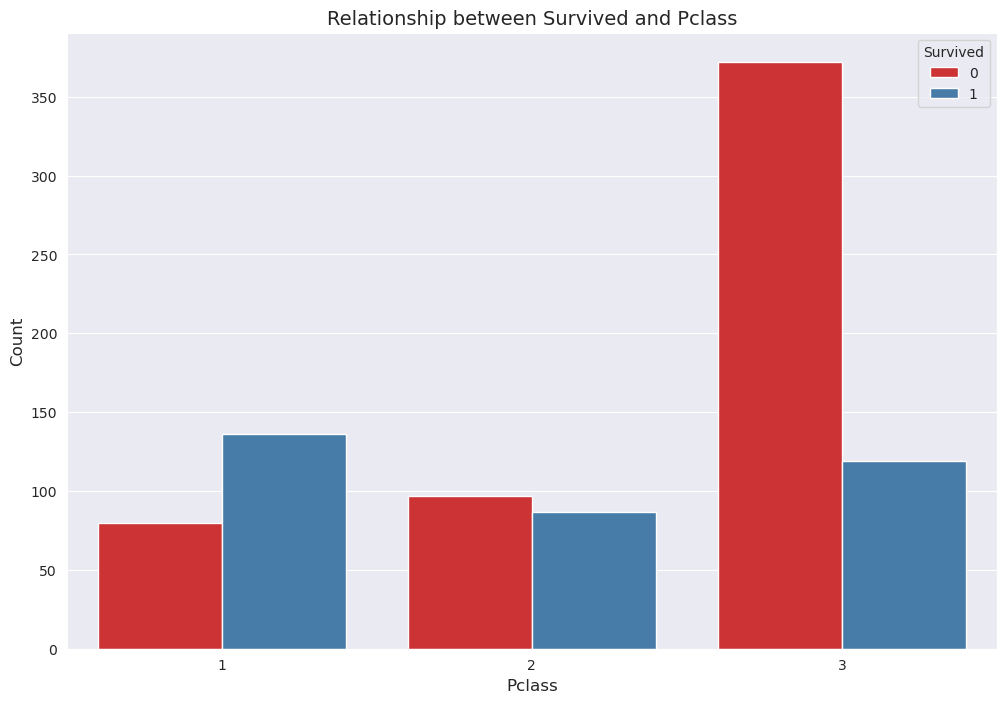

In [42]:
# Relationship between Survived and Pclass
plot_cat_vs_target(df_train_copy, 'Pclass', 'Survived', 'Pclass', 'Count', 'Relationship between Survived and Pclass')

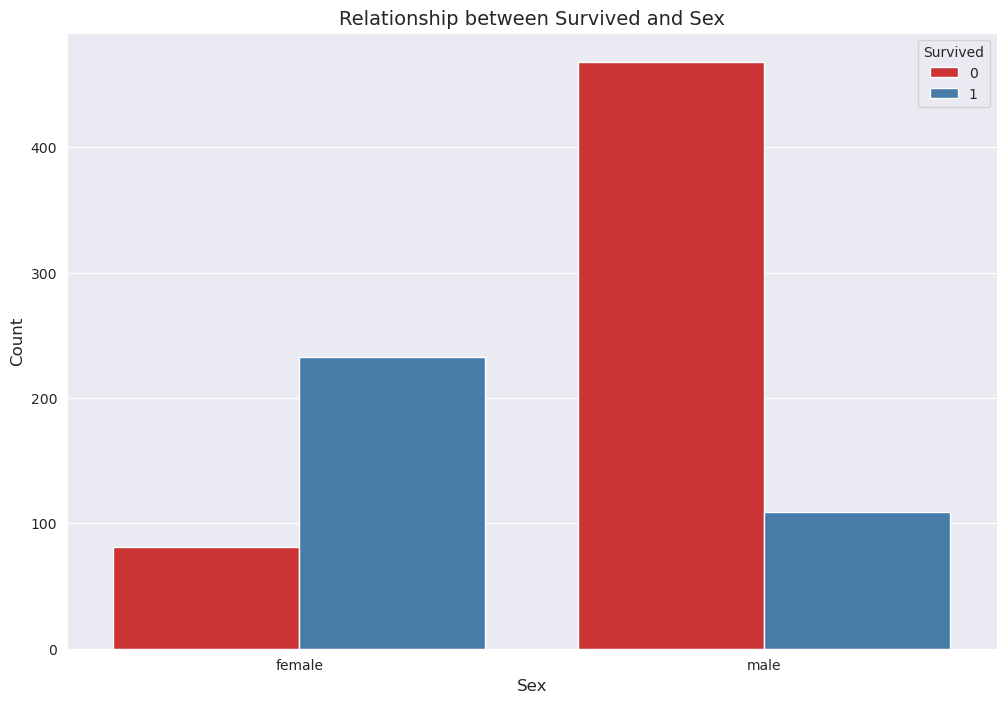

In [43]:
# Relationship between Survived and Sex
plot_cat_vs_target(df_train_copy, 'Sex', 'Survived', 'Sex', 'Count', 'Relationship between Survived and Sex')

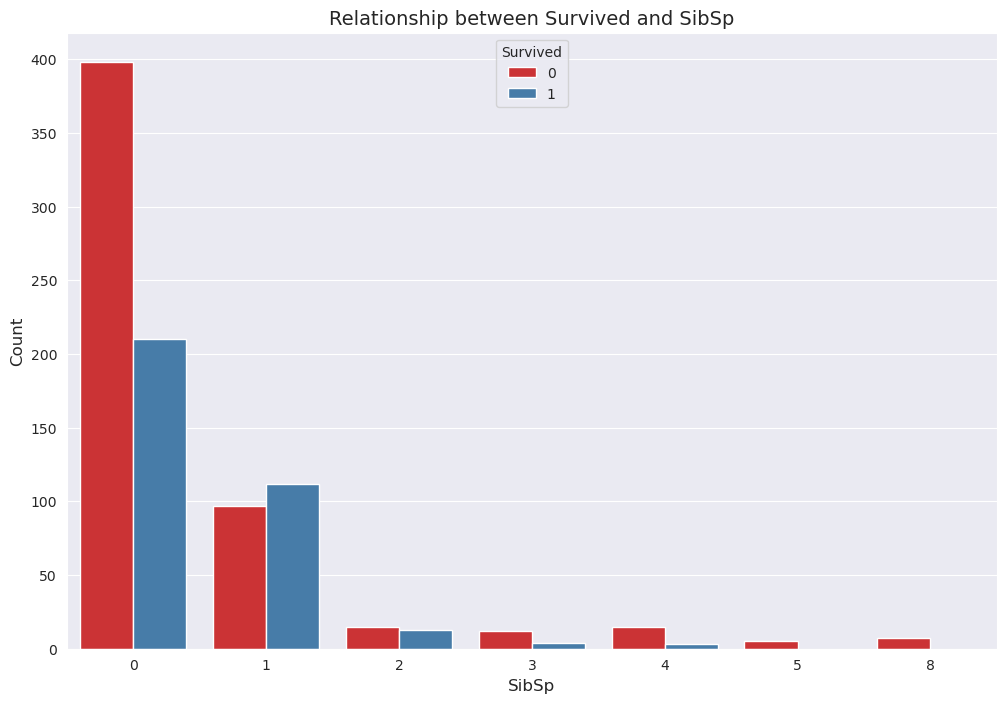

In [44]:
# Relationship between Survived and SibSp
plot_cat_vs_target(df_train_copy, 'SibSp', 'Survived', 'SibSp', 'Count', 'Relationship between Survived and SibSp')

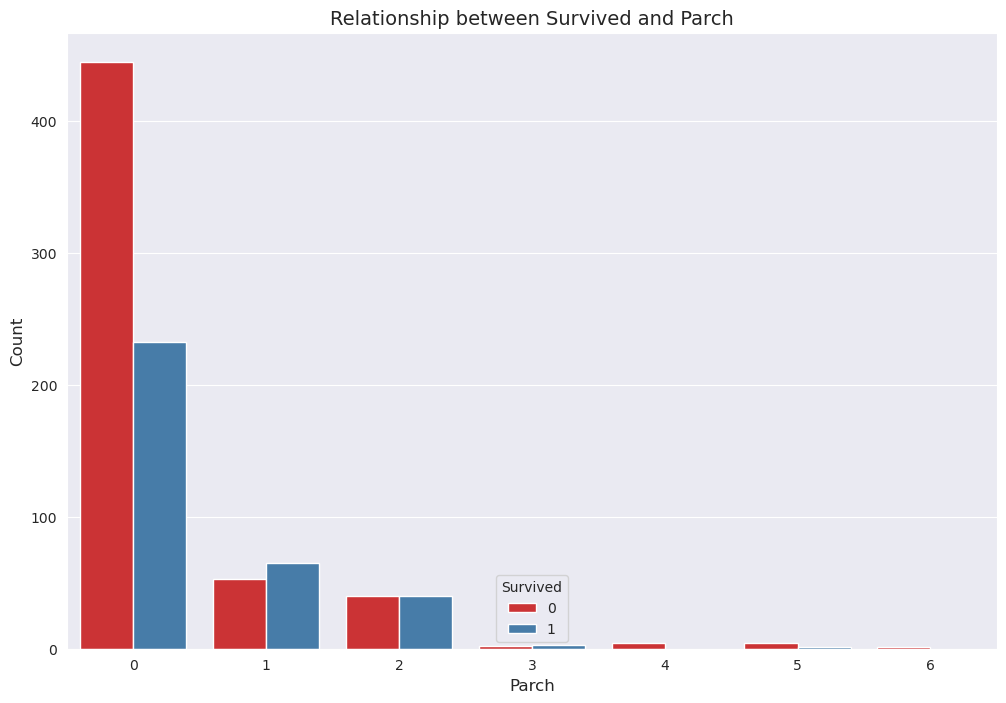

In [45]:
# Relationship between Survived and Parch
plot_cat_vs_target(df_train_copy, 'Parch', 'Survived', 'Parch', 'Count', 'Relationship between Survived and Parch')

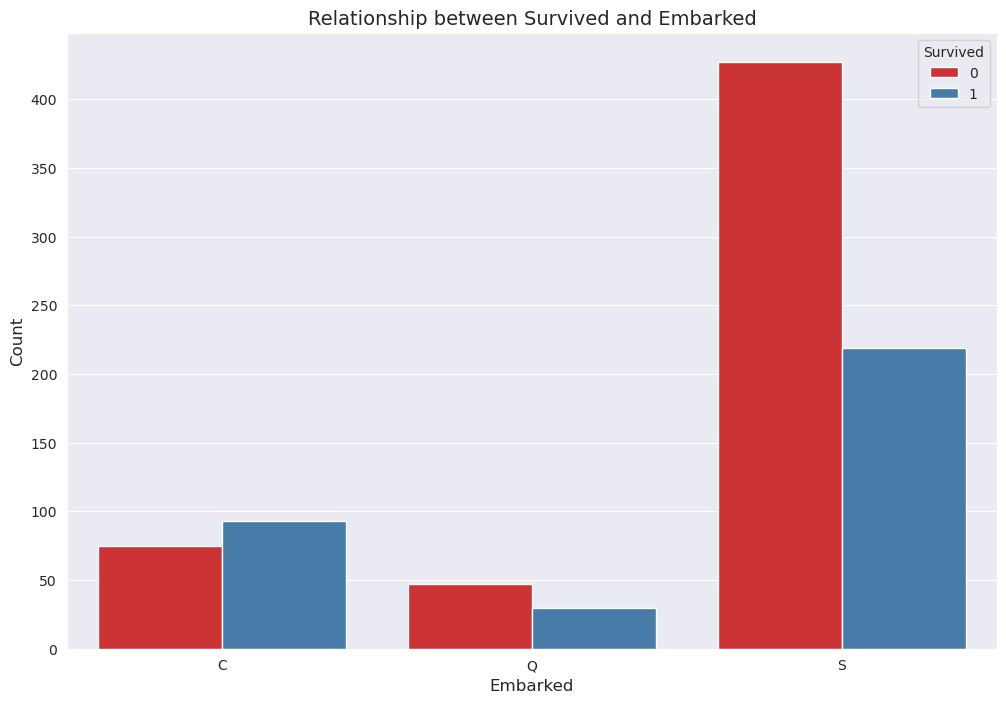

In [46]:
# Relationship between Survived and Embarked
plot_cat_vs_target(df_train_copy, 'Embarked', 'Survived', 'Embarked', 'Count', 'Relationship between Survived and Embarked')

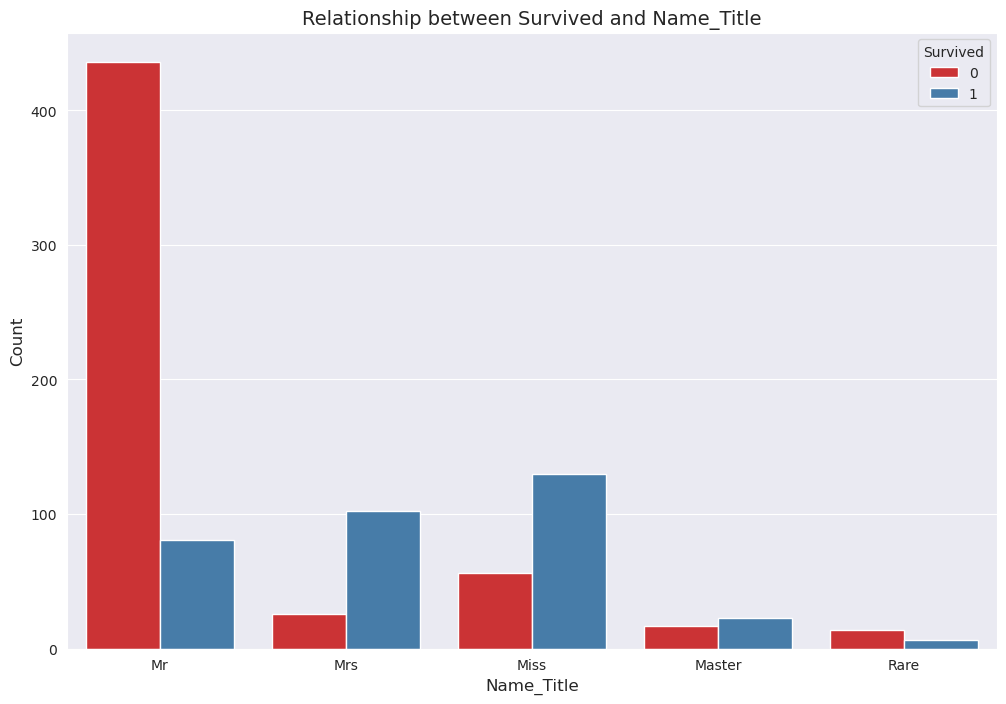

In [47]:
# Relationship between Survived and Name_Title
plot_cat_vs_target(df_train_copy, 'Name_Title', 'Survived', 'Name_Title', 'Count', 'Relationship between Survived and Name_Title')

In [48]:
# Let's create a variable Family_Size by adding SibSp and Parch
df_train_copy['Family_Size'] = df_train_copy['SibSp'].astype('int') + df_train_copy['Parch'].astype('int') + 1

df_test_copy['Family_Size'] = df_test_copy['SibSp'].astype('int') + df_test_copy['Parch'].astype('int') + 1

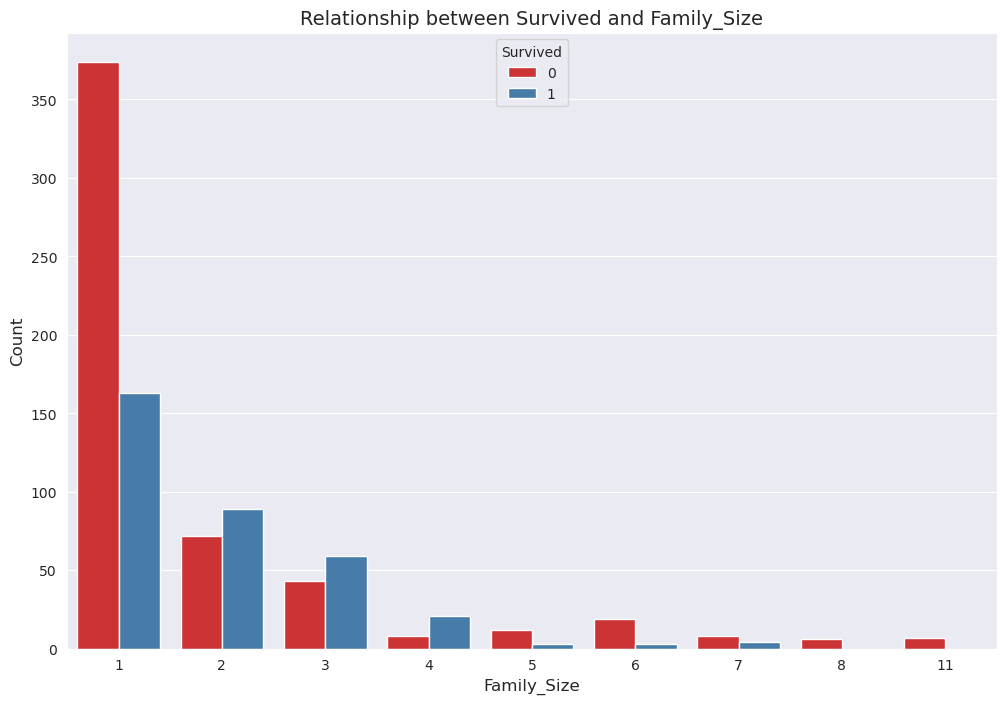

In [49]:
# Let's plot the relationship between Survived and Family_Size
plot_cat_vs_target(df_train_copy, 'Family_Size', 'Survived', 'Family_Size', 'Count', 'Relationship between Survived and Family_Size')

In [50]:
# Let's create a variable class from Cabin column by extracting the first character of the string
df_train_copy['Cabin_class'] = df_train_copy['Cabin'].astype('str').str[0]
df_test_copy['Cabin_class'] = df_test_copy['Cabin'].astype('str').str[0]
df_train_copy['Cabin_class'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin_class, dtype: int64

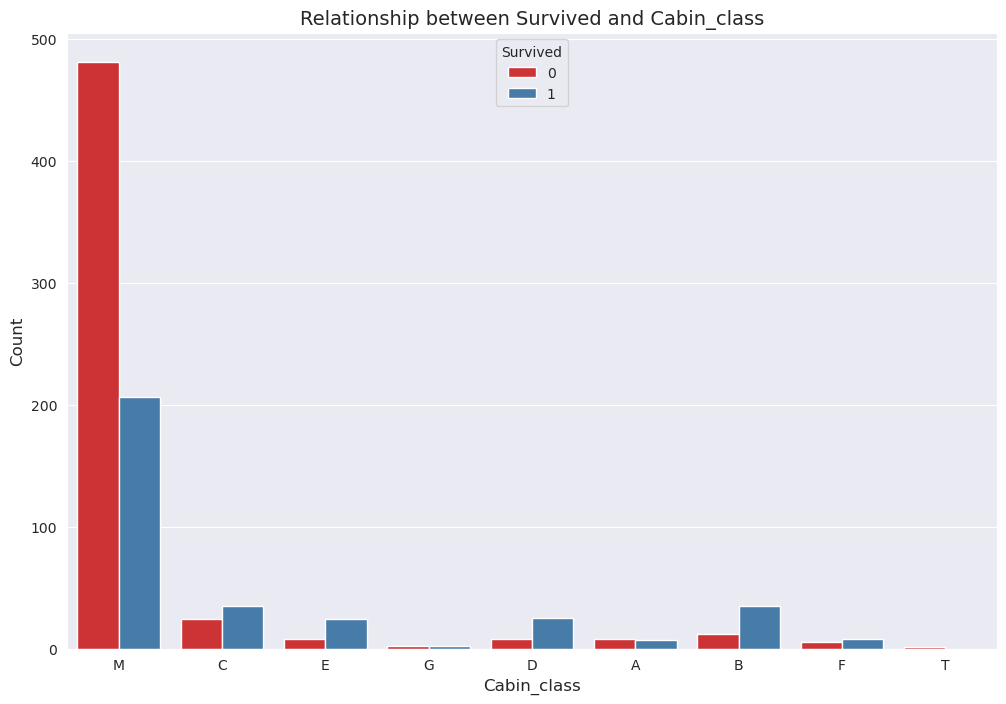

In [51]:
# Let's plot the relationship between Survived and Cabin_class
plot_cat_vs_target(df_train_copy, 'Cabin_class', 'Survived', 'Cabin_class', 'Count', 'Relationship between Survived and Cabin_class')

<div class="col-md-8">
    <h3 id="section5">5. Data Preprocessing</h3>
    <p>Before we use variables in our model, we need to preprocess them. We will perform the following steps:</p>
    <ul>
        <li>One-hot encode categorical variables</li>
        <li>Lable encode categorical variables</li>
    </ul>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [52]:
# Function to encode categorical variables, we will use scikit-learn's LabelEncoder for label encoding and pandas get_dummies for one-hot encoding
from sklearn.preprocessing import LabelEncoder
def encode_cat(df, col, encoding_type):
    if encoding_type == 'label':
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])
    elif encoding_type == 'onehot':
        df = pd.get_dummies(df, columns=[col], prefix=[col])
    return df

In [53]:
# Let's check train data before encoding
# df_train_copy.Survived.value_counts(), df_train_copy.Pclass.value_counts(), df_train_copy.SibSp.value_counts(), df_train_copy.Parch.value_counts(), df_train_copy.Embarked.value_counts(), df_train_copy.Cabin.value_counts(), df_train_copy.Name_Title.value_counts()

In [54]:
# Let's check test data after encoding
# df_test_copy.Pclass.value_counts(), df_test_copy.SibSp.value_counts(), df_test_copy.Parch.value_counts(), df_test_copy.Embarked.value_counts(), df_test_copy.Cabin.value_counts(), df_test_copy.Name_Title.value_counts()

In [55]:
# Let's bin the age column
df_train_copy['Age_bin'] = pd.cut(df_train_copy['Age'], bins=[0, 12, 20, 40, 120], labels=['Children', 'Teenage', 'Adult', 'Elder'])

df_test_copy['Age_bin'] = pd.cut(df_test_copy['Age'], bins=[0, 12, 20, 40, 120], labels=['Children', 'Teenage', 'Adult', 'Elder'])

In [56]:
# Encoding variables in the training dataset and create a new dataframe called df_train_encoded
df_train_encoded = df_train_copy.copy()
df_train_encoded = encode_cat(df_train_encoded, 'Survived', 'label')
df_train_encoded = encode_cat(df_train_encoded, 'Cabin', 'label')
df_train_encoded = encode_cat(df_train_encoded, 'Pclass', 'label')
df_train_encoded = encode_cat(df_train_encoded, 'Sex', 'onehot')
df_train_encoded = encode_cat(df_train_encoded, 'SibSp', 'label')
df_train_encoded = encode_cat(df_train_encoded, 'Parch', 'label')
df_train_encoded = encode_cat(df_train_encoded, 'Embarked', 'label')
df_train_encoded = encode_cat(df_train_encoded, 'Name_Title', 'onehot')
df_train_encoded = encode_cat(df_train_encoded, 'Cabin_class', 'label')
df_train_encoded = encode_cat(df_train_encoded, 'Family_Size', 'onehot')
df_train_encoded = encode_cat(df_train_encoded, 'Age_bin', 'onehot')


# Encoding variables in the test dataset and create a new dataframe called df_test_encoded
df_test_encoded = df_test_copy.copy()
df_test_encoded = encode_cat(df_test_encoded, 'Cabin', 'label')
df_test_encoded = encode_cat(df_test_encoded, 'Pclass', 'label')
df_test_encoded = encode_cat(df_test_encoded, 'Sex', 'onehot')
df_test_encoded = encode_cat(df_test_encoded, 'SibSp', 'label')
df_test_encoded = encode_cat(df_test_encoded, 'Parch', 'label')
df_test_encoded = encode_cat(df_test_encoded, 'Embarked', 'label')
df_test_encoded = encode_cat(df_test_encoded, 'Name_Title', 'onehot')
df_test_encoded = encode_cat(df_test_encoded, 'Cabin_class', 'label')
df_test_encoded = encode_cat(df_test_encoded, 'Family_Size', 'onehot')
df_test_encoded = encode_cat(df_test_encoded, 'Age_bin', 'onehot')

In [57]:
# Let's check train data before encoding
# df_train_encoded.Survived.value_counts(), df_train_encoded.Pclass.value_counts(), df_train_encoded.SibSp.value_counts(), df_train_encoded.Parch.value_counts(), df_train_encoded.Embarked.value_counts(), df_train_encoded.Cabin.value_counts(), df_train_encoded.Name_Title.value_counts()

In [58]:
# Let's check train data before encoding
# df_test_encoded.Pclass.value_counts(), df_test_encoded.SibSp.value_counts(), df_test_encoded.Parch.value_counts(), df_test_encoded.Embarked.value_counts(), df_test_encoded.Cabin.value_counts(), df_test_encoded.Name_Title.value_counts()

In [59]:
# df_test_copy.Family_Size.value_counts()

<p>Now that we have preprocessed the variables, let's check the correlation between them:</p>

In [60]:
# Function to plot correlation between variables
def plot_corr(df, size=20):
    corr = df.corr()
#     print(corr)
    fig, ax = plt.subplots(figsize=(size, size))
    sns.heatmap(corr, annot=True, linewidths=.5, ax=ax, cmap='crest')
    plt.show() 

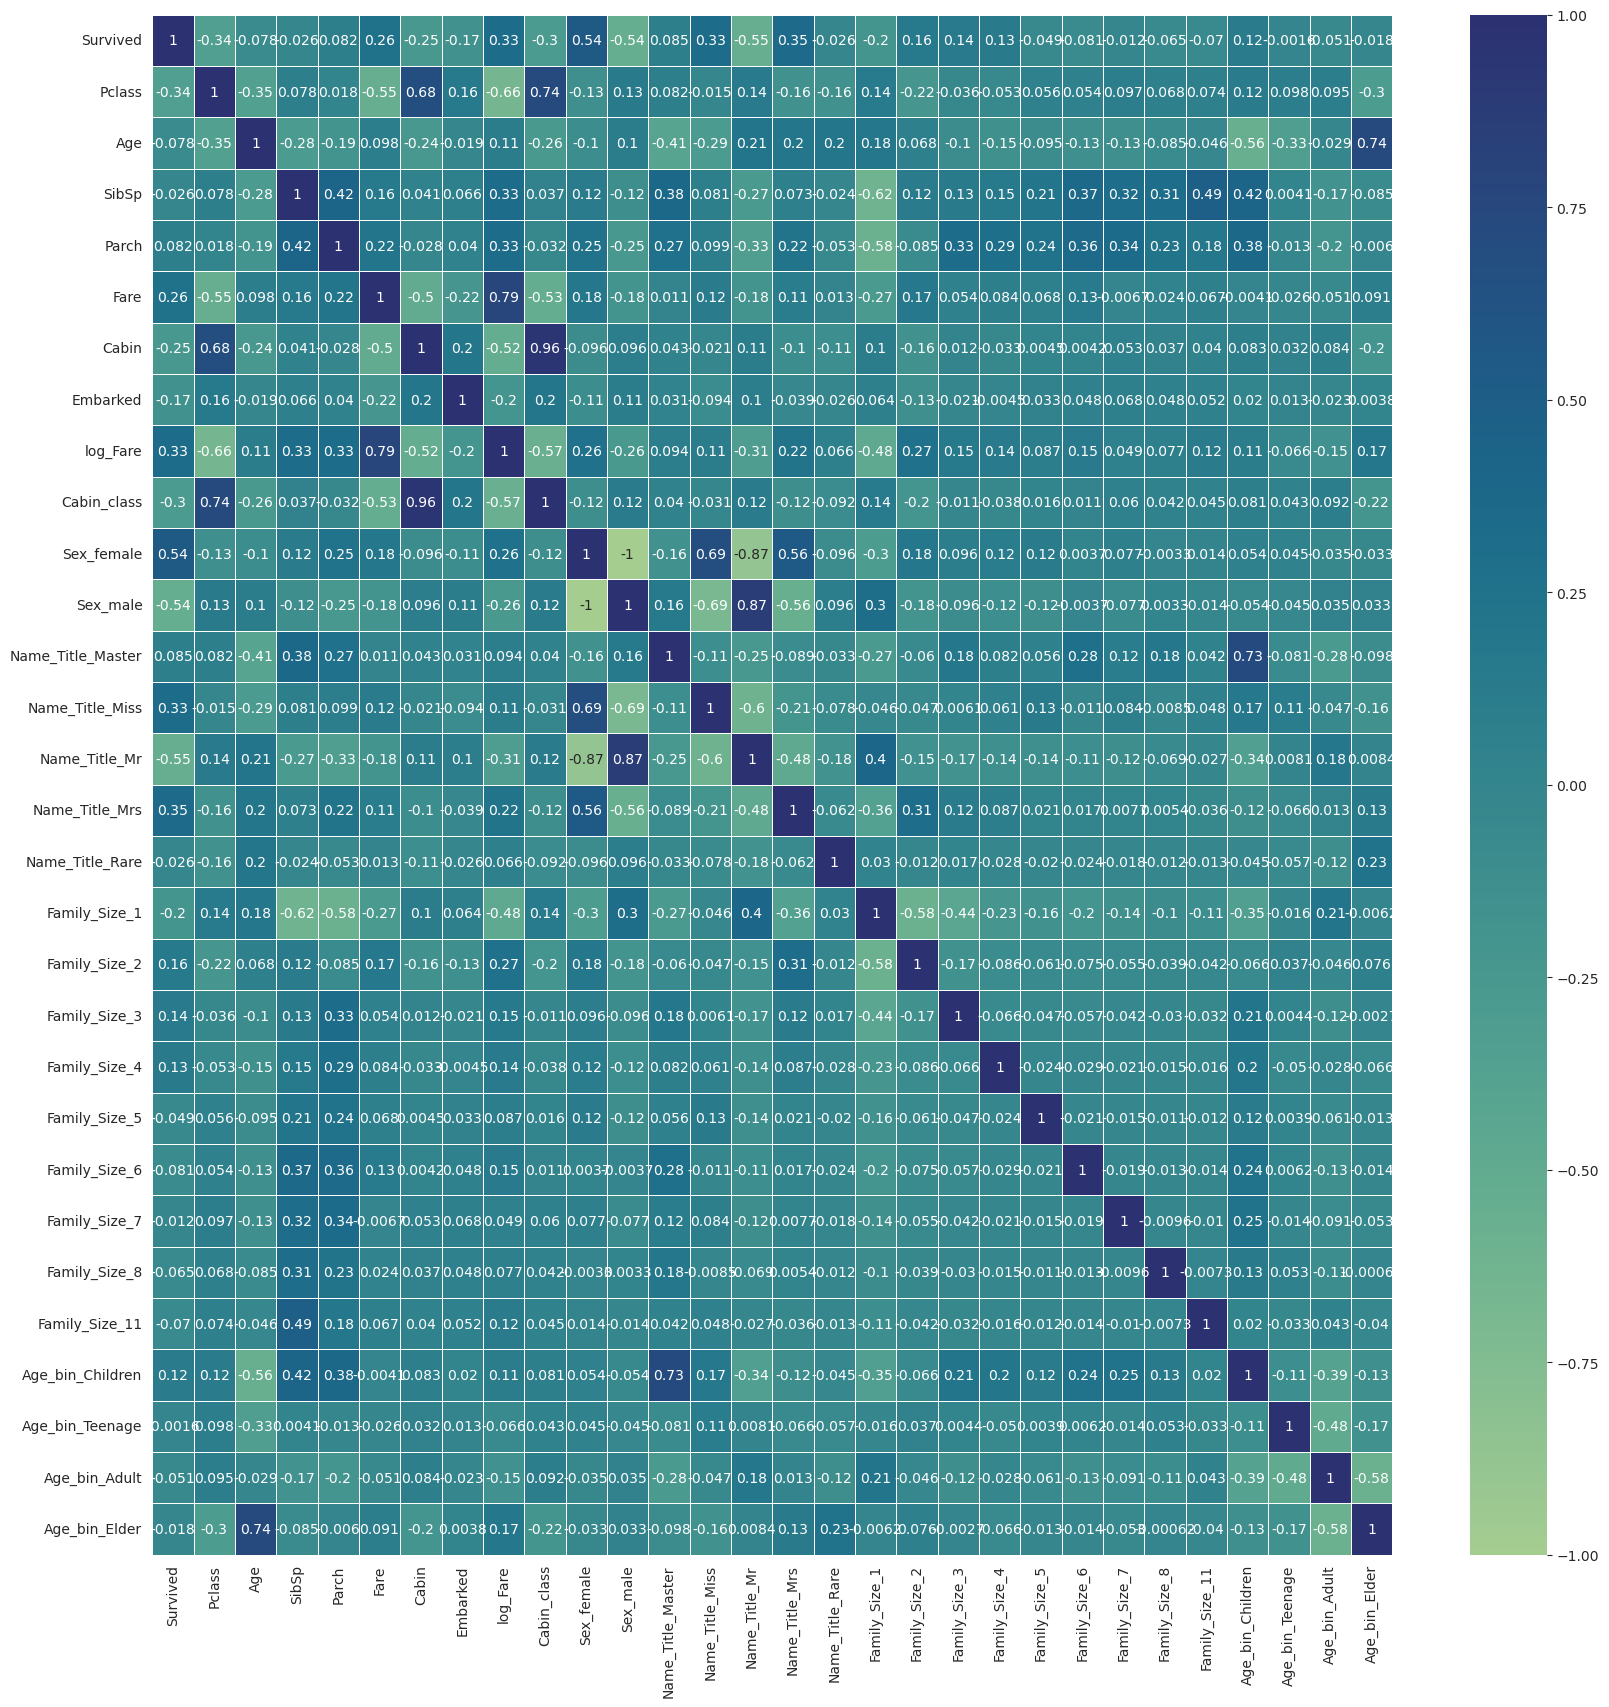

In [61]:
# Correlation between variables in the training set
plot_corr(df_train_encoded.drop(['PassengerId', 'Name', 'Ticket'], axis=1))

<p>Let's check the correlation between the variables and the target variable:</p>

In [62]:
# Function to plot correlation of variables with the target variable as a barplot
def plot_corr_target(df, target, size=10):
    corr = df.corr()
    corr_target = corr[target]
    corr_target = corr_target.sort_values(ascending=False)
    corr_target = corr_target.drop(target)
    plt.figure(figsize=(size, size))
    corr_target.plot.barh()
    plt.show()

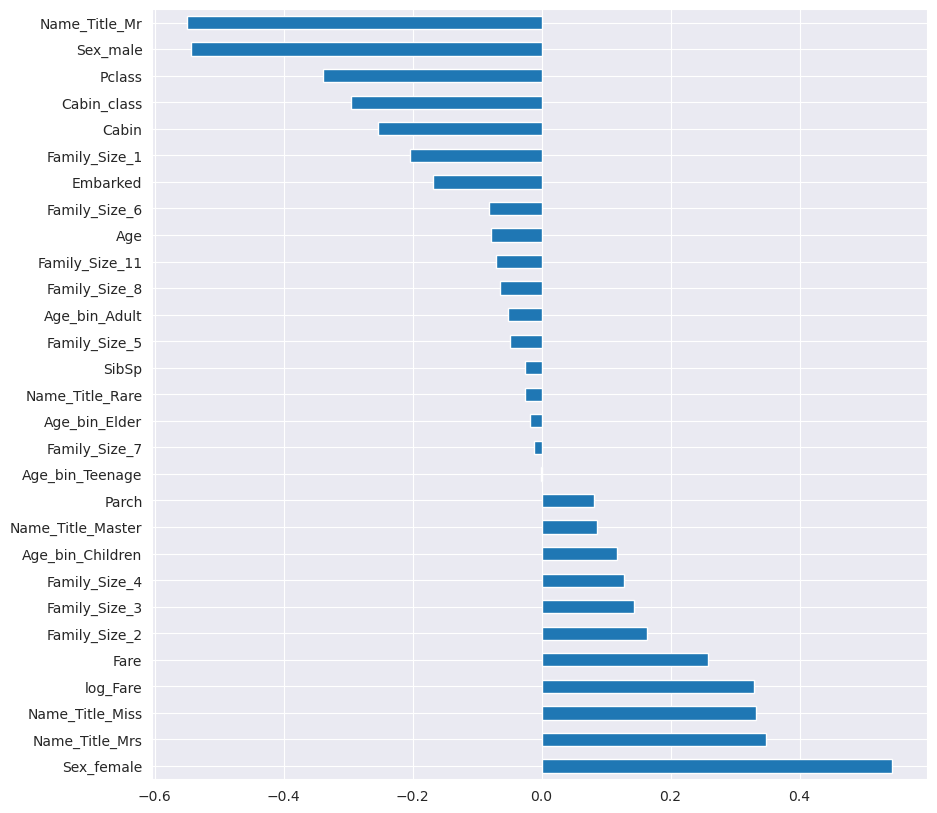

In [63]:
# Check correlation of variables with the target variable
plot_corr_target(df_train_encoded.drop(['Name', 'Ticket', 'PassengerId'], axis=1), 'Survived')

<div class="col-md-8">
    <h3 id="section6">6. Model Building</h3>
    <p>Let's build a model to predict the Survival of passengers on the Titanic:</p>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [64]:
# We will first separate the target variable from the features
y = df_train_encoded['Survived']
x = df_train_encoded.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
x.shape, y.shape

((891, 29), (891,))

<p>Let's scale the features usinf scikit-learn's MinMax scaler:</p>

In [65]:
## Importing the MinMax Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [66]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [67]:
# Check data after scaling
x.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,log_Fare,Cabin_class,Sex_female,Sex_male,Name_Title_Master,Name_Title_Miss,Name_Title_Mr,Name_Title_Mrs,Name_Title_Rare,Family_Size_1,Family_Size_2,Family_Size_3,Family_Size_4,Family_Size_5,Family_Size_6,Family_Size_7,Family_Size_8,Family_Size_11,Age_bin_Children,Age_bin_Teenage,Age_bin_Adult,Age_bin_Elder
0,1.0,0.271174,0.166667,0.0,0.014151,0.993197,1.0,0.338125,0.875,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.472229,0.166667,0.0,0.139136,0.551020,0.0,0.685892,0.250,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.321438,0.000000,0.0,0.015469,0.993197,1.0,0.350727,0.875,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.434531,0.166667,0.0,0.103644,0.374150,1.0,0.639463,0.250,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.434531,0.000000,0.0,0.015713,0.993197,1.0,0.352955,0.875,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<p>Now, let's split the dataset into training and test sets:</p>

In [68]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 50 , stratify=y, test_size=0.25)


<div class="col-md-8">
    <h3 id="section7">7. Model Generation and Evaluation</h3>
    <p>We will use different classification algorithms to build models and evaluate them using F1 score:</p>
    <h4 id="sub_section2_1">i. </h4>
</div>
<div class="col-md-4">
    <a href="#contents">Back to top</h2>
</div>

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import FactorAnalysis

## Checking the assumptions of applying Factor Analysis

### Assumption 1 - Sample size

In [71]:
# shape of the training data
train_x.shape

(668, 29)

### Assumption 2 - Variable Sample ratio

In [73]:
# variable to sample ratio
train_x.shape[0]/train_x.shape[1]

23.03448275862069

### Assumption 3 - Correlation Value

In [74]:
# correlation between training variables
train_x.corr()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,log_Fare,Cabin_class,Sex_female,Sex_male,Name_Title_Master,Name_Title_Miss,Name_Title_Mr,Name_Title_Mrs,Name_Title_Rare,Family_Size_1,Family_Size_2,Family_Size_3,Family_Size_4,Family_Size_5,Family_Size_6,Family_Size_7,Family_Size_8,Family_Size_11,Age_bin_Children,Age_bin_Teenage,Age_bin_Adult,Age_bin_Elder
Pclass,1.000000,-0.350403,0.070160,-0.004603,-0.565617,0.705201,0.154858,-0.689055,0.758076,-0.150224,0.150224,0.091771,-0.027723,0.165608,-0.163440,-0.195043,0.143231,-0.218538,-0.033490,-0.050800,0.039863,0.061014,0.087924,0.069353,0.061984,0.119635,0.088303,0.115379,-0.311010
Age,-0.350403,1.000000,-0.295139,-0.261501,0.063349,-0.246445,-0.011613,0.083274,-0.254296,-0.101150,0.101150,-0.415462,-0.295139,0.213574,0.190679,0.209312,0.209579,0.043971,-0.071695,-0.152374,-0.079897,-0.177880,-0.140139,-0.123624,-0.059573,-0.548222,-0.334902,-0.048164,0.751042
SibSp,0.070160,-0.295139,1.000000,0.431815,0.162137,0.035943,0.058622,0.321180,0.030913,0.121500,-0.121500,0.421869,0.075464,-0.292458,0.079973,-0.032983,-0.616604,0.110989,0.130207,0.175827,0.183406,0.386795,0.342308,0.389150,0.425249,0.433865,0.014621,-0.186169,-0.090319
Parch,-0.004603,-0.261501,0.431815,1.000000,0.228567,-0.042869,0.014505,0.341202,-0.047609,0.231805,-0.231805,0.326376,0.113461,-0.347318,0.184972,-0.062272,-0.611954,-0.078466,0.383894,0.331191,0.265983,0.313560,0.292486,0.187368,0.167461,0.408244,0.013132,-0.168927,-0.092419
Fare,-0.565617,0.063349,0.162137,0.228567,1.000000,-0.494832,-0.200103,0.798830,-0.530249,0.193583,-0.193583,0.022429,0.134747,-0.203185,0.108202,0.018092,-0.290140,0.187024,0.061248,0.091362,0.108554,0.092165,-0.007854,0.026893,0.060211,0.009760,-0.003734,-0.050490,0.060613
Cabin,0.705201,-0.246445,0.035943,-0.042869,-0.494832,1.000000,0.198138,-0.546049,0.963327,-0.114856,0.114856,0.039459,-0.045415,0.134595,-0.098769,-0.130557,0.131395,-0.196088,0.005902,-0.023598,-0.017571,0.024214,0.050672,0.039969,0.035722,0.075129,0.020577,0.107006,-0.209096
Embarked,0.154858,-0.011613,0.058622,0.014505,-0.200103,0.198138,1.000000,-0.182974,0.198857,-0.118736,0.118736,0.032492,-0.105100,0.113308,-0.043290,-0.032977,0.072763,-0.137913,-0.013423,0.004031,0.011962,0.027349,0.065786,0.051891,0.046377,0.005019,0.011941,-0.020031,0.011544
log_Fare,-0.689055,0.083274,0.321180,0.341202,0.798830,-0.546049,-0.182974,1.000000,-0.600149,0.272175,-0.272175,0.108834,0.129088,-0.335224,0.217889,0.076907,-0.478940,0.269600,0.156928,0.152946,0.106890,0.120187,0.040910,0.082863,0.105628,0.117275,-0.042581,-0.154323,0.148818
Cabin_class,0.758076,-0.254296,0.030913,-0.047609,-0.530249,0.963327,0.198857,-0.600149,1.000000,-0.144105,0.144105,0.042569,-0.061797,0.152686,-0.117707,-0.108268,0.163485,-0.227457,-0.011961,-0.031878,-0.006456,0.030484,0.057032,0.044986,0.040206,0.074536,0.031214,0.109356,-0.220915
Sex_female,-0.150224,-0.101150,0.121500,0.231805,0.193583,-0.114856,-0.118736,0.272175,-0.144105,1.000000,-1.000000,-0.168494,0.680909,-0.851600,0.567691,-0.107625,-0.335761,0.228837,0.120356,0.126537,0.115209,-0.027468,0.033791,-0.027850,0.023822,0.025038,0.050283,-0.011902,-0.046716


In [75]:
# arranging the correlation in decsending order
c = train_x.corr().abs()
s = c.unstack()
so = s.sort_values(ascending=False)

In [76]:
# number of variables having correlation more than 0.5
count=0
for i in range(len(so.values)):
    if so.values[i] < 1.0 and so.values[i] >= 0.5:
        count = count + 1
print(count)

46


In [85]:
# creating the random forest regressor model
model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=100)

In [86]:
# fitting the model on original dataset
model.fit(train_x,train_y)

RandomForestClassifier(max_depth=3, random_state=1)

In [87]:
# predicting for the original validation set
pred_1 = model.predict(test_x)

In [88]:
# checking the training performance (accuracy_score)
print(accuracy_score(model.predict(train_x), train_y))

0.8263473053892215


In [89]:
# checking the training performance (accuracy_score)
print(accuracy_score(pred_1, test_y))

0.7982062780269058


In [90]:
# creating the factor analysis model
fa = FactorAnalysis(n_components=10)

In [91]:
# transforming the original train and validation set
X_train_transformed = fa.fit_transform(train_x)
X_valid_transformed = fa.fit_transform(test_x)

In [93]:
# fitting the same random forest model on transformed data
model.fit(X_train_transformed,train_y)

RandomForestClassifier(max_depth=3, random_state=1)

In [94]:
# predicting for the transformed validation set
pred_2 = model.predict(X_valid_transformed)

In [95]:
# checking the training performance on transformed data (accuracy_score)
print(accuracy_score(model.predict(X_train_transformed), train_y))

0.8173652694610778


In [96]:
# checking the validation performance on transformed data (root mean squared error)
print(accuracy_score(pred_2, test_y))

0.7623318385650224
